# Basic Vector Operations

<style> p { text-align: justify; } </style>

Vector data is a fundamental type of geospatial data that represents geographic features as points, lines, or polygons. Each feature is associated with attributes, making it possible to store and analyze spatial and non-spatial data together. In this chapter, you'll learn how to perform basic operations on vector data using Python, including reading data, inspecting it, filtering, and performing basic transformations.

We'll use the `GeoPandas` library for these operations, which simplifies working with vector data in Python. GeoPandas extends pandas to handle spatial data and integrates seamlessly with libraries like matplotlib for visualization.

## Loading and Inspecting

`GeoPandas` allows you to read vector data formats such as Shapefiles, GeoJSON, or GeoPackages. Here's how you can load a GeoPackage file:

In [1]:
import geopandas as gpd 

# Load a geopackage file
file_path = "data/vector/kanchanpur.gpkg"
vector_data = gpd.read_file(file_path)

# View the first few rows
print(vector_data.head())

           NAME                                           geometry
0  BaisiBichawa  MULTIPOLYGON (((80.49934 28.64667, 80.49709 28...
1      Beldandi  MULTIPOLYGON (((80.25229 28.75782, 80.25377 28...
2      Chandani  MULTIPOLYGON (((80.10973 28.98432, 80.10986 28...
3        Daijee  MULTIPOLYGON (((80.34424 29.05416, 80.34449 29...
4   Dekhatbhuli  MULTIPOLYGON (((80.44701 28.78921, 80.43608 28...


- The `read_file()` function reads the vector data and returns a GeoDataFrame.
- You can inspect the structure of the data using `.head()`, which displays the first few rows.

Once the data is loaded, it's essential to understand its structure and content. GeoPandas provides useful attributes and methods for this purpose.

In [3]:
# Check the geometry column
print(vector_data.geometry.head())

# Display the column names
print(vector_data.columns)

# Check the Coordinate Reference System (CRS)
print(vector_data.crs)

0    MULTIPOLYGON (((80.49934 28.64667, 80.49709 28...
1    MULTIPOLYGON (((80.25229 28.75782, 80.25377 28...
2    MULTIPOLYGON (((80.10973 28.98432, 80.10986 28...
3    MULTIPOLYGON (((80.34424 29.05416, 80.34449 29...
4    MULTIPOLYGON (((80.44701 28.78921, 80.43608 28...
Name: geometry, dtype: geometry
Index(['NAME', 'geometry'], dtype='object')
EPSG:4326


- `Geometry Column`: Contains the spatial features (e.g., points, lines, polygons).
- `Attributes`: Columns other than the geometry represent non-spatial data (e.g., population, area).
- `CRS`: The Coordinate Reference System defines how the data is projected on the Earth's surface.

## Subsetting

Subsetting involves selecting a subset of features based on specific conditions or attributes. You can subset vector data using boolean expressions on columns or spatial conditions.

### Subsetting Based on Attribute

For example, let's subset the data to select only features where the Name attribute is "Sreepur".

       NAME                                           geometry
18  Sreepur  MULTIPOLYGON (((80.34809 28.73316, 80.3589 28....


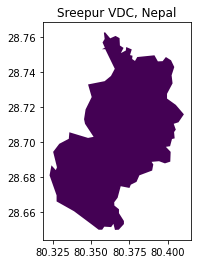

In [14]:
# Subset "Sreepur" data
sreepur_data = vector_data[vector_data['NAME'] == 'Sreepur']

# View the subset
print(sreepur_data.head())

# Plot the subsetted data
import matplotlib.pyplot as plt

sreepur_data.plot(column='NAME', cmap='viridis', legend=False)
plt.title("Sreepur VDC, Nepal")
plt.show()


### Subsetting Based on Spatial Location

You can also subset data based on spatial relationships, such as features that lie within a certain bounding box.

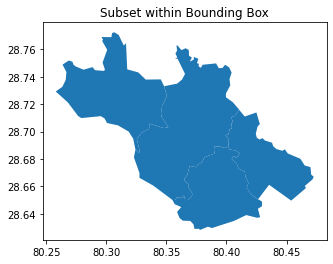

In [13]:
# Define a bounding box (minx, miny, maxx, maxy)
bbox = (80.3, 28.6, 80.4, 28.7)

# Subset data within the bounding box
bbox_data = vector_data.cx[bbox[0]:bbox[2], bbox[1]:bbox[3]]

# Plot the subsetted data
bbox_data.plot()
plt.title("Subset within Bounding Box")
plt.show()

## Spatial Transformations

Spatial transformations modify the geometry of features. Common transformations include creating buffers and reprojecting the data to a new CRS.

### Reprojecting

To reproject data into a new CRS, use the `.to_crs()` method. Since, the vector data we are using here in this tutorial lies in UTM zone 45N as per projected CRS, we will use the corresponding EPSG code i.e. 32645.

In [22]:
# Reproject to UTM 45N (EPSG:32645)
reprojected_data = sreepur_data.to_crs(epsg=32645)

# Check the new CRS
print(reprojected_data.crs)

epsg:32645


### Buffering features

The buffer operation creates a zone around a feature at a specified distance. It is often used for proximity analysis, such as determining areas within a certain distance of a road or river.

<Axes: >

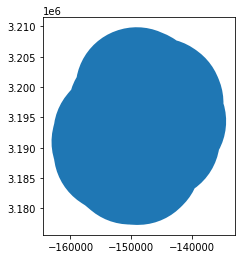

In [23]:
# Create a 10-kilometers buffer around Sreepur
buffered_data = reprojected_data.copy()
buffered_data['geometry'] = reprojected_data.geometry.buffer(10000)

# Plot the buffered data
buffered_data.plot()

## Intersection

The intersection operation allows you to find spatial relationships between two layers of vector data. This can be helpful for tasks like finding the overlap between two polygons, or identifying which features from one layer intersect with another.

Here, we have two GeoDataFrames: one representing administrative boundaries and another representing protected areas. To find areas where protected areas and administrative boundaries overlap:

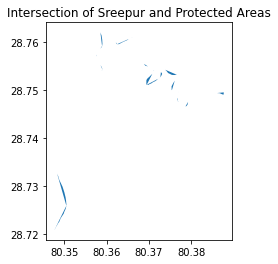

    NAME_1       WDPAID                     NAME_2
0  Sreepur  555569941.0  Suklaphanta - Buffer Zone


In [41]:
# Load protected areas GeoDataFrame
wdpa_data = gpd.read_file("data/vector/protected_areas.gpkg")

# Perform the intersection
intersection = gpd.overlay(sreepur_data, wdpa_data, how='intersection')

# Plot the intersection
intersection.plot()
plt.title("Intersection of Sreepur and Protected Areas")
plt.show()

# View the result
print(intersection.iloc[:, [0, 1, 4]].head(1)) # only view important columns

- `:` selects all rows.
- `[0, 1, 4]` selects the first, second and fifth columns (indexed starting at 0).
- `.head()` limits the output to the first few rows.

## Area Computation

One of the fundamental operations in geospatial analysis is calculating the area of features. This is particularly useful for tasks like land cover analysis, urban planning, or environmental studies.

To compute the area of each feature in a GeoDataFrame, you can use the `.area` property. GeoPandas calculates the area of each feature in its native CRS. Here in this section, we will compute the area of Kanchanpur district.

In [42]:
# Ensure that the CRS is in a projected coordinate system (not WGS84)
# This step is important for accurate area calculations
projected_data = vector_data.to_crs(epsg=32645)  # UTM Zone 45N

# Calculate area for each feature (in square meters)
projected_data['area'] = projected_data.geometry.area

# Display the area of the first few features
print(projected_data[['NAME', 'area']].head())

           NAME          area
0  BaisiBichawa  7.447664e+07
1      Beldandi  2.490623e+07
2      Chandani  3.251720e+07
3        Daijee  1.028231e+08
4   Dekhatbhuli  9.110952e+07


Since, there are 21 VDCs in kanchanpur district, we got the area of each polygons. Let's compute the total area of kanchanpur district using sum() function

In [45]:
# Compute the total area (sum of all feature areas)
total_area = projected_data['area'].sum()

# Convert total area to square kilometers
total_area_sqkm = total_area / 1_000_000

# Print the total area
print(f"Total Area: {total_area_sqkm:.2f} square kilometers")

Total Area: 1633.44 square kilometers


- `.sum()` method computes the total area by summing up the area column.
- `:.2f` format ensures the total area is displayed with two decimal places.